# POSTTEST 6 KECERDASAN BUATAN
*Maulana Muhammad Hafidz / 2109106070*

Pada posttest 6 ini saya mengganti dataset dengan link : https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset

Target dataset : Rings

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("abalone-Copy1.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Mengkonversi target ke binary

In [8]:
df['Rings'] = df['Rings'].apply(lambda x: 1 if x > 10 else 0)

Pisahkan Feature dan Target

In [7]:
X = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Sex']]
y = df['Rings']

Melakukan encoding pada kolom "Sex"

In [10]:
X = pd.get_dummies(X, columns=['Sex'], prefix='Sex', drop_first=True)

Bagi dataset menjadi Train dan Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standarisasi pada kolom feature

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Membuat model squential

In [15]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Mengompilasi model

In [17]:
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)

Melatih Model

In [19]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/50
84/84 [==============================] - 2s 8ms/step - loss: 0.5318 - accuracy: 0.7152 - val_loss: 0.5285 - val_accuracy: 0.7175
Epoch 2/50
33/84 [==========>...................] - ETA: 0s - loss: 0.4660 - accuracy: 0.7652

D:\Kuliah\SEMESTER 5\Kecerdasan Buatan\Praktikum\Posttest\Posttest 1\venv_B1-21\maulana_070\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


84/84 [==============================] - 0s 5ms/step - loss: 0.4824 - accuracy: 0.7597 - val_loss: 0.4818 - val_accuracy: 0.7743
Epoch 3/50
84/84 [==============================] - 0s 4ms/step - loss: 0.4643 - accuracy: 0.7706 - val_loss: 0.4623 - val_accuracy: 0.7982
Epoch 4/50
84/84 [==============================] - 0s 4ms/step - loss: 0.4528 - accuracy: 0.7781 - val_loss: 0.4583 - val_accuracy: 0.7862
Epoch 5/50
84/84 [==============================] - 0s 4ms/step - loss: 0.4438 - accuracy: 0.7841 - val_loss: 0.4657 - val_accuracy: 0.7907
Epoch 6/50
84/84 [==============================] - 0s 4ms/step - loss: 0.4379 - accuracy: 0.7927 - val_loss: 0.4460 - val_accuracy: 0.8012
Epoch 7/50
84/84 [==============================] - 0s 4ms/step - loss: 0.4340 - accuracy: 0.7893 - val_loss: 0.4548 - val_accuracy: 0.7877
Epoch 8/50
84/84 [==============================] - 0s 4ms/step - loss: 0.4314 - accuracy: 0.7882 - val_loss: 0.4542 - val_accuracy: 0.7937
Epoch 9/50
84/84 [=============

In [20]:
score = model.evaluate(X_test, y_test, verbose=1)

27/27 [==============================] - 0s 4ms/step - loss: 0.4327 - accuracy: 0.8038


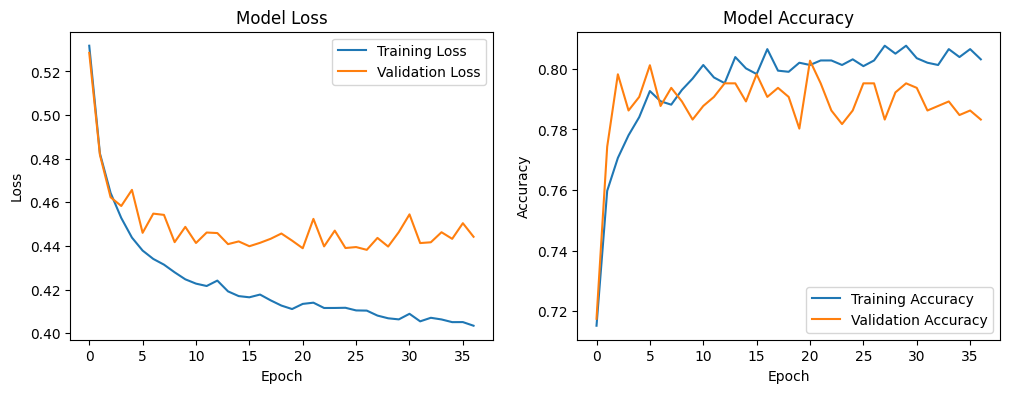

In [21]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.show()